In [3]:
import pandas as pd
import numpy as np

In [13]:
premier =(df1["day"] > "2019-12-18")

In [11]:
df1.dtypes

callsign         object
number           object
icao24           object
registration     object
typecode         object
origin           object
destination      object
firstseen        object
lastseen         object
day              object
latitude_1      float64
longitude_1     float64
altitude_1      float64
latitude_2      float64
longitude_2     float64
altitude_2      float64
dtype: object

In [16]:
covid_new = df1_new.append(df2, ignore_index=True)

In [20]:
covid_new.drop(["callsign","number", "icao24" ,"registration", "typecode"], axis = 1, inplace = True )

In [22]:
# Origin par China  et filtrer ( ZUCK, ZGSZ)
# destination, find china and remove / 
# drop china na destination 

In [23]:
covid_new.replace(to_replace =["VHHH", "ZGGG", "VMMC", "ZGOW", "ZGSD", "ZGSZ", "ZSAM", "ZSWZ", "ZUCK", "ZYHE"], 
                            value ="CHINA", inplace = True)

In [25]:
covid_new.to_csv(r'C:\Users\UTILISATEUR\Desktop\Borel\C2.csv', index = False)

In [26]:
# drop les valeurs qui ne sont pas chine dans la colonnes origin
cond = covid_new["origin"] != 'CHINA'
covid_new.drop(covid_new[cond].index, inplace = True)

In [27]:
covid_new.shape #a ce stade nous avons 68915 partant de la chine vers d'autre pays 

(68915, 5)

In [28]:
# drop china dans destination

In [29]:
cond2 = covid_new["destination"] == 'CHINA'
covid_new.drop(covid_new[cond2].index, inplace = True)

In [31]:
# clean missing and NAN values 
# change Day type 
# destination par kombo
# Merge Covid ( confirm case) file a partir ya country na date 


In [32]:
# clean missing and NAN values 
covid_new.dropna(axis=0, inplace=True)
# change Day type 

In [36]:
# after cleaning the remaining rows is 29021

In [37]:
# creation des valeurs uniques pour tirer les origines et destinations
df_ac = pd.DataFrame(list(set().union(covid_new.origin.unique(), covid_new.destination.unique())))

In [38]:
# Creation des valeurs uniques des destinations
df_ab = pd.DataFrame(list(covid_new.destination.unique()))

In [4]:
# tout commence ici
covid_19 =  pd.read_csv(r"C:\Users\UTILISATEUR\Desktop\Borel\COVID-19.csv")
covid_19.tail() #covid record start from 22 Janv 2020

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
181995,2021-10-28,Zimbabwe,NaN,132880,0.0,4675
181996,2021-10-29,Zimbabwe,NaN,132926,0.0,4675
181997,2021-10-30,Zimbabwe,NaN,132926,0.0,4675
181998,2021-10-31,Zimbabwe,NaN,132977,0.0,4678
181999,2021-11-01,Zimbabwe,NaN,133007,0.0,4679


In [5]:
covid_19.shape

(182000, 6)

In [32]:
# we need to limit the date to 15th March 2020
# let's make a condition for that 
# and then remove all the records whose dates are beyond 

In [6]:
noLockdown = covid_19['Date'] < "2020-03-16"
covid_19_noLockdown = covid_19[noLockdown]
covid_19_noLockdown.tail()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
181399,2020-03-11,Zimbabwe,NaN,0,0.0,0
181400,2020-03-12,Zimbabwe,NaN,0,0.0,0
181401,2020-03-13,Zimbabwe,NaN,0,0.0,0
181402,2020-03-14,Zimbabwe,NaN,0,0.0,0
181403,2020-03-15,Zimbabwe,NaN,0,0.0,0


In [7]:
covid_19_noLockdown.shape #15 K records upto 15 March 20

(15120, 6)

In [8]:
covid_19_noLockdown.dtypes #date format a changer et uniformiser les deux dataframes  / province à drop / 

Date               object
Country/Region     object
Province/State     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [9]:
covid_19['Date'] = pd.to_datetime(covid_19['Date'], infer_datetime_format=True)
covid_19['Date'].head() #Date formatted 

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [10]:
air_traffic = pd.read_csv(r"C:\Users\UTILISATEUR\Desktop\Borel\Air.csv")

In [11]:
air_traffic.tail() #let's limit to 15 March

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic
29017,China,Hungary,3/29/2020 16:07,3/30/2020 5:51,3/30/2020 2:00
29018,China,Sri Lanka,3/30/2020 3:30,3/30/2020 8:17,3/30/2020 2:00
29019,China,Turkey,3/30/2020 6:33,3/30/2020 16:58,3/30/2020 2:00
29020,China,Bahrain,3/30/2020 23:53,3/31/2020 8:29,3/31/2020 2:00
29021,China,Czech Republic,3/31/2020 0:13,3/31/2020 18:34,3/31/2020 2:00


In [12]:
air_traffic.shape

(29022, 5)

In [13]:
noLockdown = air_traffic['Date Air_traffic'] < "3/16/2020"
air_traffic_noLockdown = air_traffic[noLockdown]
air_traffic_noLockdown.tail()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic
28978,China,Austria,3/14/2020 2:33,3/14/2020 15:57,3/14/2020 1:00
28979,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,3/14/2020 1:00
28980,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,3/14/2020 1:00
28981,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,3/15/2020 1:00
28982,China,Bahrain,3/14/2020 23:19,3/15/2020 8:02,3/15/2020 1:00


In [14]:
air_traffic_noLockdown.shape #24 k flights

(25459, 5)

In [15]:
air_traffic_noLockdown.dtypes

Origin              object
Country/Region      object
Firstseen           object
Lastseen            object
Date Air_traffic    object
dtype: object

In [16]:
air_traffic_noLockdown['Date Air_traffic'] = pd.to_datetime(air_traffic_noLockdown['Date Air_traffic'], infer_datetime_format=True)

<ipython-input-16-821f615b5315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date Air_traffic'] = pd.to_datetime(air_traffic_noLockdown['Date Air_traffic'], infer_datetime_format=True)


In [17]:
air_traffic_noLockdown['Date'] = air_traffic_noLockdown['Date Air_traffic'].dt.date
air_traffic_noLockdown['Date'].tail()

<ipython-input-17-86932f970f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date'] = air_traffic_noLockdown['Date Air_traffic'].dt.date


28978    2020-03-14
28979    2020-03-14
28980    2020-03-14
28981    2020-03-15
28982    2020-03-15
Name: Date, dtype: object

In [18]:
air_traffic_noLockdown[['Date','Date Air_traffic']].head()

,Date,Date Air_traffic
0,2019-12-20,2019-12-20 01:00:00
1,2019-12-20,2019-12-20 01:00:00
2,2019-12-20,2019-12-20 01:00:00
3,2019-12-20,2019-12-20 01:00:00
4,2019-12-20,2019-12-20 01:00:00


In [19]:
air_copy = air_traffic_noLockdown.copy()

In [20]:
air_traffic_noLockdown['Date'] = pd.to_datetime(air_traffic_noLockdown['Date'], infer_datetime_format=True)
air_traffic_noLockdown['Date'].tail()

<ipython-input-20-97322caae21a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_traffic_noLockdown['Date'] = pd.to_datetime(air_traffic_noLockdown['Date'], infer_datetime_format=True)


28978   2020-03-14
28979   2020-03-14
28980   2020-03-14
28981   2020-03-15
28982   2020-03-15
Name: Date, dtype: datetime64[ns]

In [21]:
# let's drop province
covid_19_noLockdown = covid_19_noLockdown.drop(['Province/State'], inplace = False, axis=1)
covid_19_noLockdown.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


In [22]:
covid_19_noLockdown.tail()

,Date,Country/Region,Confirmed,Recovered,Deaths
181399,2020-03-11,Zimbabwe,0,0.0,0
181400,2020-03-12,Zimbabwe,0,0.0,0
181401,2020-03-13,Zimbabwe,0,0.0,0
181402,2020-03-14,Zimbabwe,0,0.0,0
181403,2020-03-15,Zimbabwe,0,0.0,0


In [23]:
covid_19_noLockdown.shape

(15120, 5)

In [27]:
covid_19_noLockdown[covid_19_noLockdown["Deaths"] >= 12]

,Date,Country/Region,Confirmed,Recovered,Deaths
44228,2020-02-19,China,470,120.0,12
44229,2020-02-20,China,476,136.0,12
44230,2020-02-21,China,479,175.0,12
44231,2020-02-22,China,479,204.0,12
44232,2020-02-23,China,480,222.0,12
...,...,...,...,...,...
165801,2020-03-13,US,2219,12.0,51
165802,2020-03-14,US,2978,12.0,58
165803,2020-03-15,US,3212,12.0,70
175552,2020-03-14,United Kingdom,2630,18.0,29


In [28]:
covid_19_noLockdown.dtypes

Date               object
Country/Region     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [32]:
covid_19_noLockdown['Date'].head(1)

0    2020-01-22
Name: Date, dtype: object

In [29]:
air_traffic_noLockdown['Date'].head(1)

0   2019-12-20
Name: Date, dtype: datetime64[ns]

In [30]:
covid_19_noLockdown['Date'] = pd.to_datetime(covid_19_noLockdown['Date'], infer_datetime_format=True)
covid_19_noLockdown['Date'].tail(1)

181403   2020-03-15
Name: Date, dtype: datetime64[ns]

In [31]:
covid_19 = covid_19_noLockdown.copy()

In [32]:
air_traffic_noLockdown.dtypes #datetime64[ns]

Origin                      object
Country/Region              object
Firstseen                   object
Lastseen                    object
Date Air_traffic    datetime64[ns]
Date                datetime64[ns]
dtype: object

In [33]:
#merged_df = left_df.merge(right_df, 

covid_alpha = air_traffic_noLockdown.merge(covid_19_noLockdown, how = 'left', left_on=['Country/Region','Date'], right_on=['Country/Region','Date'])
covid_alpha.head()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
0,China,Taiwan,12/20/2019 0:43,12/20/2019 1:50,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
1,China,Taiwan,12/20/2019 1:02,12/20/2019 2:29,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
2,China,Taiwan,12/20/2019 1:26,12/20/2019 2:33,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
3,China,Taiwan,12/20/2019 1:46,12/20/2019 2:55,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN
4,China,Taiwan,12/20/2019 2:05,12/20/2019 3:11,2019-12-20 01:00:00,2019-12-20,NaN,NaN,NaN


In [34]:
covid_alpha.tail()

,Origin,Country/Region,Firstseen,Lastseen,Date Air_traffic,Date,Confirmed,Recovered,Deaths
38815,China,Austria,3/14/2020 2:33,3/14/2020 15:57,2020-03-14 01:00:00,2020-03-14,655.0,6.0,1.0
38816,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,2020-03-14 01:00:00,2020-03-14,5.0,0.0,0.0
38817,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,2020-03-14 01:00:00,2020-03-14,10.0,1.0,0.0
38818,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,2020-03-15 01:00:00,2020-03-15,214.0,60.0,0.0
38819,China,Bahrain,3/14/2020 23:19,3/15/2020 8:02,2020-03-15 01:00:00,2020-03-15,214.0,60.0,0.0


In [35]:
covid_alpha.shape # 38K

(38820, 9)

In [36]:
covid_alpha.isnull().sum()

Origin                  0
Country/Region       1887
Firstseen               0
Lastseen                0
Date Air_traffic        0
Date                    0
Confirmed           18344
Recovered           22200
Deaths              18344
dtype: int64

In [37]:
covid_alpha.drop(["Date Air_traffic"], axis = 1, inplace = True )


In [38]:
covid_alpha # replace NAN by 0 although prophet algo works well with NAN

,Origin,Country/Region,Firstseen,Lastseen,Date,Confirmed,Recovered,Deaths
0,China,Taiwan,12/20/2019 0:43,12/20/2019 1:50,2019-12-20,NaN,NaN,NaN
1,China,Taiwan,12/20/2019 1:02,12/20/2019 2:29,2019-12-20,NaN,NaN,NaN
2,China,Taiwan,12/20/2019 1:26,12/20/2019 2:33,2019-12-20,NaN,NaN,NaN
3,China,Taiwan,12/20/2019 1:46,12/20/2019 2:55,2019-12-20,NaN,NaN,NaN
4,China,Taiwan,12/20/2019 2:05,12/20/2019 3:11,2019-12-20,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
38815,China,Austria,3/14/2020 2:33,3/14/2020 15:57,2020-03-14,655.0,6.0,1.0
38816,China,Turkey,3/14/2020 11:36,3/14/2020 22:39,2020-03-14,5.0,0.0,0.0
38817,China,Sri Lanka,3/14/2020 13:22,3/14/2020 18:38,2020-03-14,10.0,1.0,0.0
38818,China,Bahrain,3/14/2020 22:00,3/15/2020 6:49,2020-03-15,214.0,60.0,0.0


In [39]:
#Prophet Algo

In [40]:
%matplotlib inline


In [42]:
conda install -c conda-forge prophet

^C

Note: you may need to restart the kernel to use updated packages.


In [44]:
from fbprophet import Prophet

In [46]:
from fbprophet.plot import add_changepoints_to_plot

In [4]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 4.2 MB/s eta 0:00:01    |▉                               | 665 kB 1.9 MB/s eta 0:00:13     |█████████▌                      | 7.5 MB 3.9 MB/s eta 0:00:05     |███████████████████████▎        | 18.4 MB 3.4 MB/s eta 0:00:03


In [47]:
print('Prophet %s' % Prophet) 

Prophet <class 'fbprophet.forecaster.Prophet'>


In [ ]:
# - feed the model upto 15 th March 2020 since it was when flight bans were imposed mostly;
#   set the prediction for two months (May and June 2020) while tuning some hyperparameters.

# - do mostly visualisation in order to compare these results agaisnt the real figures, to check the accuracy, 
# - run the model for 10 countries having the most number of flights with China, change months to predict, 
# - tune hyperparameters differently,
# - add more regressors...

# - I have used PowerBI to convert/match the airport codes to countries name, it made it a lot more easier and faster. I can send you the list and the procedure if you want.


In [48]:
covid_alpha.columns

Index(['Origin', 'Country/Region', 'Firstseen', 'Lastseen', 'Date',
       'Confirmed', 'Recovered', 'Deaths'],
      dtype='object')

In [49]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(covid_alpha['Date'])
df['y'] = covid_alpha['Confirmed']

df.tail()

,ds,y
38815,2020-03-14,655.0
38816,2020-03-14,5.0
38817,2020-03-14,10.0
38818,2020-03-15,214.0
38819,2020-03-15,214.0


In [61]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [53]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Date')

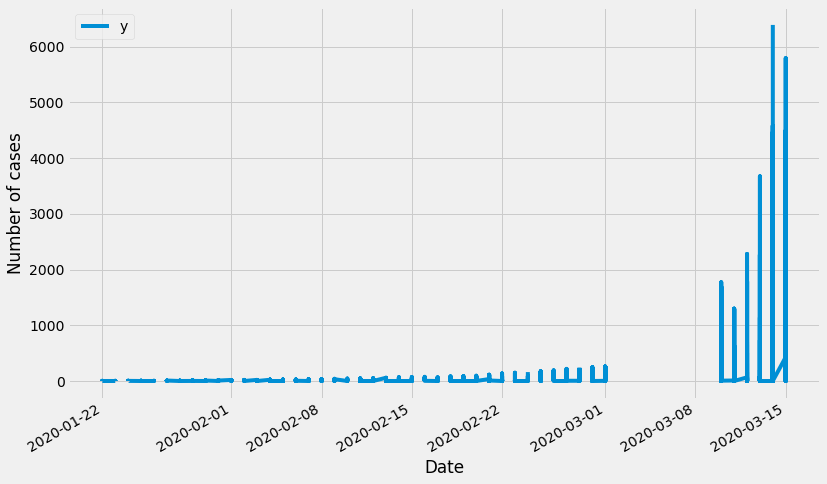

In [54]:
plt.style.use('fivethirtyeight')
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Number of cases')#('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')


In [ ]:
# we need to ask the dataset questions like what are the countries which have more number of flights with China
# then to predict that they will have more cases. finally, to verify that claim

In [ ]:
# we have invastigate why there is a gap btw 2020-03-01 and 2020-03-08

In [55]:
#Step 3 — Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
prophet = Prophet(seasonality_mode = 'multiplicative', yearly_seasonality=False, daily_seasonality=True, weekly_seasonality=True, interval_width=0.95)
prophet.fit(df)
future_dates = prophet.make_future_dataframe(periods=75, freq='d')
future_dates.tail()

,ds
151,2020-05-25
152,2020-05-26
153,2020-05-27
154,2020-05-28
155,2020-05-29


In [ ]:
# yhat column is the mean value of the prediction of the total
# number of covid cases. And the columns yhat_lower and yhat_upper is the lowermost and uppermost 
# value of the prediction of total number of covid cases. We will be primarily using the column yhat_lower 
# because it close to our actual value of total number of covid cases. In Figure(20), we plot predicted (yhat_lower)
#  and actual value values of total number of covid cases.


In [57]:
# comparer prediction na ba figures reel il faudrait to salela dataset oyo avec les autres pays / Dataset chine + pays
forecast = prophet.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,2020-05-25,835.444752,114.508710,1463.095261
152,2020-05-26,610.308351,95.048364,1142.637649
153,2020-05-27,865.993842,218.353019,1560.319041
154,2020-05-28,663.129950,107.422099,1233.090981
155,2020-05-29,879.882763,167.765083,1572.514316


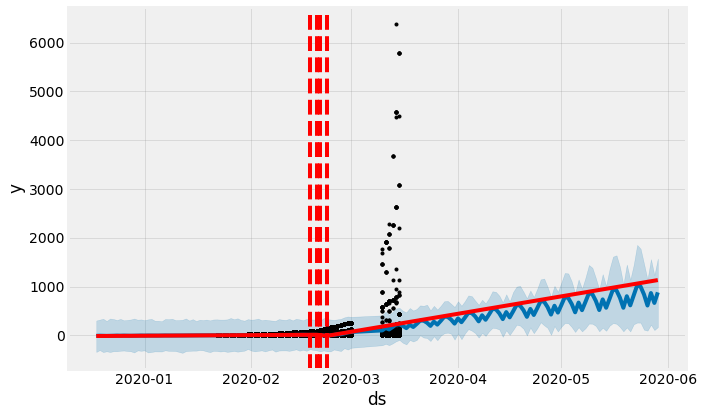

In [58]:
# on 29th may we had 5M cases worlwide. according to our findings (predicted values) on 29th may show that 2M are directly connect to China
#future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
#forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()

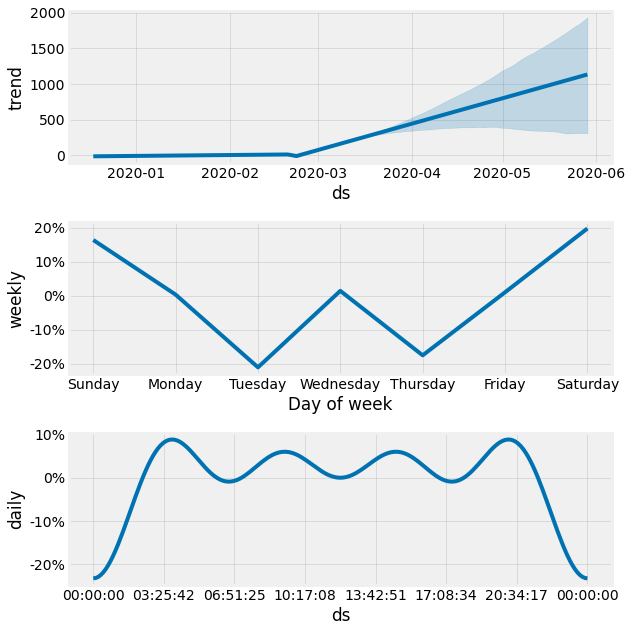

In [60]:
#a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
#plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-d9a1c76acec7>, line 3)

In [ ]:
my_model.plot(forecast,
my_model.plot_components(forec
Adding Multiple Regressors
train_dataset[‘type’] = X[‘type’]
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)
#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);


In [64]:
covid_alpha.to_csv(r"C:\Users\UTILISATEUR\Desktop\Borel\cvd.csv")

In [ ]:
# de